In [1]:
import torch
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
import numpy as np
import pickle
import sys

sys.path.append('../')

from magnitude_pruning.MagnitudePruning import MagnitudePruningNet
from utils import load_data

/Users/emilhaugstvedt/mambaforge/envs/sparse/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
dataset = "alu"

train_loader, test_loader, val_loader = load_data(f"../data/{dataset}")

train_data = train_loader.dataset
test_data = test_loader.dataset
val_data = val_loader.dataset

In [3]:
train_data.x.shape

torch.Size([199960, 13])

In [4]:
t_train = torch.linspace(0, train_loader.dataset.DT * len(train_loader.dataset.x), len(train_loader.dataset.y))
t_test = torch.linspace(0, test_loader.dataset.DT * len(train_loader.dataset.x), len(test_loader.dataset.y))
t_val = torch.linspace(0, val_loader.dataset.DT * len(val_loader.dataset.x), len(val_loader.dataset.y))

In [5]:
model = MagnitudePruningNet([13, 64, 64, 64, 8])

In [6]:
model.train_n_epochs(train_loader=train_loader, val_loader=val_loader, n_epochs=200, pruning_epoch=10, sparsity=0.9, lr=0.001, weight_decay=0.0001, verbose=True)

Epoch 0
Training loss 0.011755956336855888
Validation loss: 0.06625748425722122
Pruned. Sparsity is now 0.8997483253479004
Epoch 10
Training loss 0.322760671377182
Validation loss: 5.014450550079346


KeyboardInterrupt: 

In [ ]:
y_pred = model(test_data.x).detach().numpy()

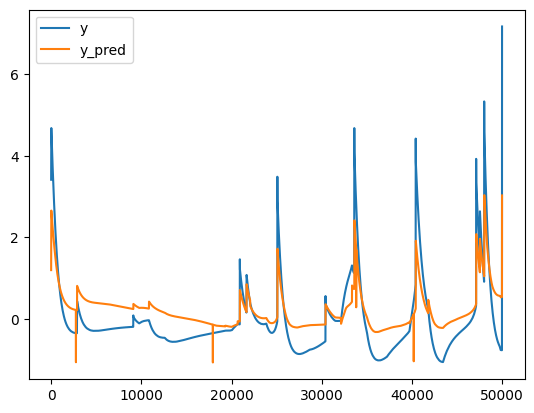

In [ ]:
# plot y and y_pred
plt.plot(t_test[:5000], test_data.y[:5000, 3], label="y")
plt.plot(t_test[:5000], y_pred[:5000, 3], label="y_pred")
plt.legend()
plt.show()

In [ ]:
for layer in model.layers:
    print(layer.weight.count_nonzero() / (layer.weight.shape[0] * layer.weight.shape[1]))

tensor(0.1010)
tensor(0.1001)
tensor(0.1001)
tensor(0.1016)


In [ ]:
model.get_sparsity()

array(0.8997483, dtype=float32)